# 8.5.1 Restricted Boltzmann machines

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.ndimage import convolve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale

import warnings
warnings.filterwarnings("ignore")

Link: https://youtu.be/bt8TvYkLOdU?si=R5yu6VE4kjSjHCxr

Links: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

Este es un modelo de aprendizaje no supervizado (red neuronal) que permite capturar las relaciones probabilisticas entre los datos.

- Su arquitectura esta compuesta por dos capas: una visible (con nodos v_i) y una oculta (con nodos h_j).
- Las entradas y las salidas son binarias {0, 1}.
- La señal se propaga de la capa de entrada a la capa oculta como:

$$ P(h_j = 1 | v) = \sigma(\sum_{i}^{} w_{ij}v_i + c_j) $$

- Luego, la señal de salida de la capa oculta se propaga a la capa de entrada como:

$$ P(v_i = 1 | h) = \sigma \left(\sum_{j}^{} w_{ij} h_j + b_i \right) $$

- El modelo usa la función logistica para la activación de las neuronas:

$$ \sigma(u) = \frac{1}{1+exp(−u)} $$

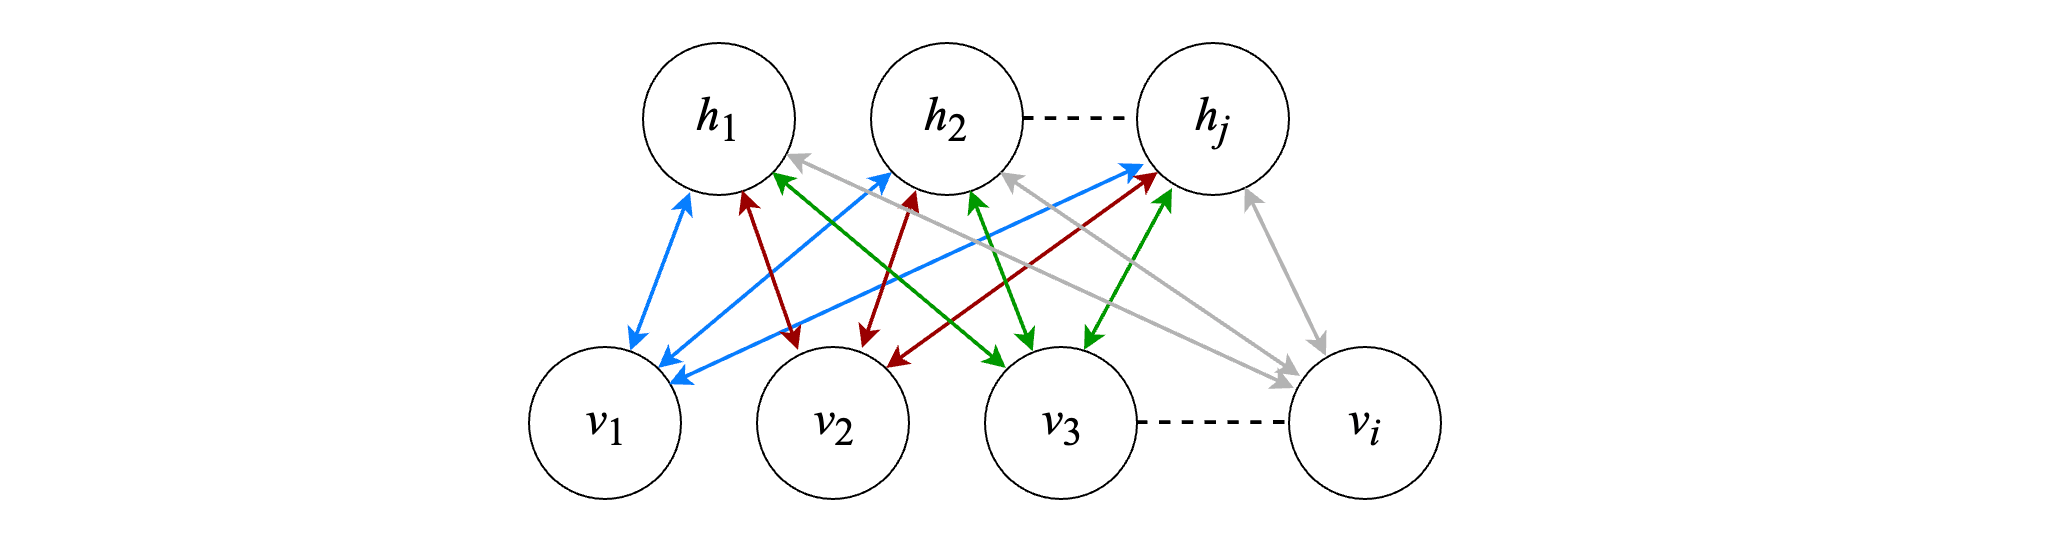

Esta red neuronal funciona como un **autoencoder**, donde la red apende a reproducir su salida.

La función de energía de la red esta dada como:

$$ E(v,h) = − \sum_{i}^{} \sum_{j}^{} w_{ij} v_i h_j − \sum_{i}^{} b_i v_i − \sum_{j}^{} c_j h_j $$

El térnino **restringido** se refiere a que está prohibida la intercación directa entre neuronas de la misma capa.

En el siguiente ejemplo, esta red neuroal es usada para extraer las características no lineales de los datos.

In [3]:
digits = load_digits(n_class=6, return_X_y=False)
X = digits.data
y = digits.target

In [4]:
def nudge_dataset(X, Y):

    direction_vectors = [
        [[0, 1, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [1, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 1], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 1, 0]],
    ]

    def shift(x, w):
        return convolve(x.reshape((8, 8)), mode="constant", weights=w).ravel()

    X = np.concatenate(
        [X] + [np.apply_along_axis(shift, 1, X, vector) for vector in direction_vectors]
    )
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

X = np.asarray(X, "float32")
X, Y = nudge_dataset(X, y)

In [5]:
X = minmax_scale(X, feature_range=(0, 1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


rbm = Pipeline(
    steps=[
        (
            "rbm",
            BernoulliRBM(
                random_state=0,
                learning_rate=0.06,
                n_iter=10,
                n_components=100,
            ),
        ),
        (
            "logistic",
            LogisticRegressionCV(
                Cs=20,
                solver="newton-cg",
                tol=1,
            ),
        ),
    ]
)

rbm.fit(X_train, Y_train)

display(
    accuracy_score(Y_train, rbm.predict(X_train)),
    accuracy_score(Y_test, rbm.predict(X_test)),
)

0.9808402585410896

0.9667590027700831

In [6]:


logisticRegressionCV = LogisticRegressionCV(
    solver="newton-cg",
    tol=1,
)

logisticRegressionCV.fit(X_train, Y_train)

display(
    accuracy_score(Y_train, logisticRegressionCV.predict(X_train)),
    accuracy_score(Y_test, logisticRegressionCV.predict(X_test)),
)

0.8843490304709142

0.8550323176361958

In [7]:
print('ok_')

ok_
